In [2]:
import cv2 as cv
import os
from IPython.core.display import Image, display
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def convert_grayscale(img):
    '''Convert To Grayscale'''
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def brightness_equalize(img):
        '''
        Brightness correction by histogram equalization.
        '''
        img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
        img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])
        img_output = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)
        return img_output

def apply_clahe(img, limit=1.2, grid=(8,8)):
    '''
    CLAHE:
    Histogram Equalization and Contrast enhancement
    '''    
    img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)

    clahe = cv.createCLAHE(clipLimit=limit, tileGridSize=grid)
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])    
    img_output = cv.cvtColor(img_yuv, cv.COLOR_YUV2BGR)        
    img_output = cv.normalize(img_output, None, 0, 255, cv.NORM_MINMAX)

    return img_output

def save_img(img, name):
    '''Save Img'''
    path = os.path.join(f"./Data/ht33_minimal/",name+".png")
    #print("saving img: %s.png"%name)
    cv.imwrite(path,img)
    return

def img_thresholding(img, th=60, color=255):
    '''
    Image Thresholding:
    Returns Inverse Binary Threshold.
    '''

    _, th_img = cv.threshold(img,th,color,cv.THRESH_BINARY_INV)

    return th_img

def show_image(img, title='Default', save=False):
    '''Display and save image'''
    if img is None:
        print('Could not find image to show.')
    else:        
        print("\n\n%%%% IMAGE: {}, SHAPE: {} %%%%".format(title, img.shape))
        fig = plt.figure(0)
        plt.imshow(img, cmap='gray')
        plt.show()
        if save:
            fig.savefig("plots/"+title+".png", dpi=300, format="png")        
    return

def find_contours(img):
    '''
    Find all the contours in an image.
    Returns: List and Hierarchy of all the contours detected
    '''
    hierarchy, contours = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

    return hierarchy, contours

def draw_contour(mask_ctr, height=1080, width=1920):
    '''
    Draw and fill the contour on the canvas as the same size of the image (H,W)
    '''
    canvas = np.zeros((height, width), dtype=np.uint8)
    if not mask_ctr is None:
        cv.drawContours(canvas, mask_ctr, -1, (255,255,255), -1)

    return canvas
def hconcat_images(image_list):
    '''Concat images horizontally'''
    return cv.hconcat(image_list)

def dilate_img(img, window_size = 5, iter = 2):
    '''
    MORPHOLOGICAL OPERATION: DILATION
    '''
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))    
    dilated_img = cv.dilate(img, kernel, iterations = iter)

    return dilated_img

def remove_watermark(image, mask):
    dst = cv.inpaint(image, mask, 10, cv.INPAINT_NS)
    return dst

def preproc(img, name, mask):
    #img = remove_watermark(img, mask)
    img = apply_clahe(img)
    save_img(img, name)

In [7]:
pth= f"./Data/ht32_minimal/"
img_list = glob(os.path.join(pth, "*"))
mask = cv.imread("./wmmask.jpg",cv.IMREAD_GRAYSCALE)
mask_dilate = dilate_img(mask, iter=3)
for i in tqdm(img_list):
    image = cv.imread(i)
    name = i.split("/")[-1].split(".")[0]
    preproc(image, name, mask_dilate)

100%|██████████| 43/43 [00:51<00:00,  1.20s/it]




%%%% IMAGE: Default, SHAPE: (1080, 1920) %%%%


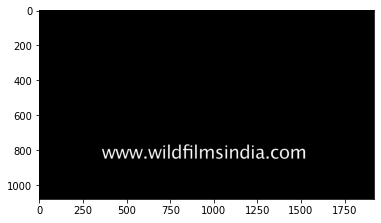

True

In [54]:
wmark = cv.imread('./watermark.jpg')
wmark_gray = convert_grayscale(wmark)
th = img_thresholding(wmark_gray, th=165)
th = 255-th
show_image(th)
#cv.imwrite("wmmask.jpg", th)

In [ ]:
pth= f"./Data/ht3/"
img_list = glob(os.path.join(pth, "*.jpg"))
i1 = img_list[0]
i1 = cv.imread(i1)
frames = list()
for i in tqdm(img_list[1:]):
    img = cv.imread(i)
    #i1 = cv.add(i1, img)
    frames.append(img.astype(np.float16))
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8) 
cv.imwrite("watermark.jpg", medianFrame)